## 9.2 Pandas에서 seaborn으로 그래프 그리기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 선 그래프

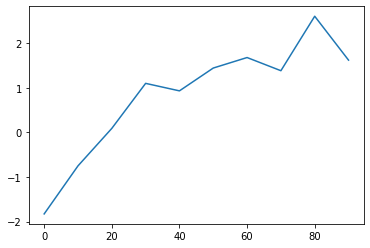

In [5]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0,100,10))
s.plot()

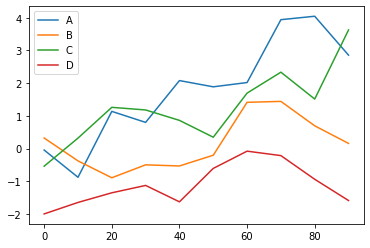

In [3]:
df= pd.DataFrame(np.random.randn(10,4).cumsum(0),
                 columns=['A','B','C','D'],
                 index=np.arange(0,100,10))
df.plot()

### 막대그래프

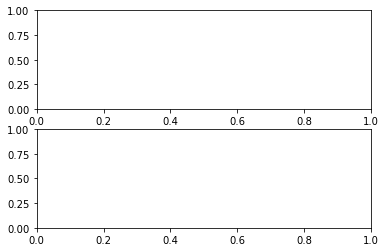

In [6]:
fig, axes=plt.subplots(2,1)

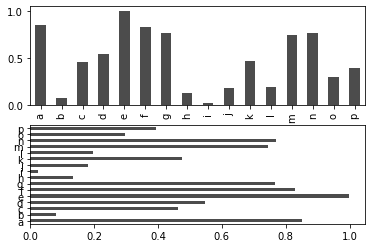

In [9]:
fig, axes=plt.subplots(2,1)
data= pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1],color='k', alpha=0.7)

In [10]:
df = pd.DataFrame(np.random.rand(6,4),
                 index=['one','two','three','four','five','six'],
                 columns=pd.Index(['A','B','C','D'], name='Genus'))
df

Genus,A,B,C,D
one,0.832592,0.187562,0.020165,0.698839
two,0.673347,0.753956,0.447007,0.814994
three,0.369493,0.791893,0.131937,0.670781
four,0.094667,0.535287,0.602887,0.483690
five,0.223682,0.298011,0.948532,0.530366
six,0.529688,0.359885,0.269330,0.708452


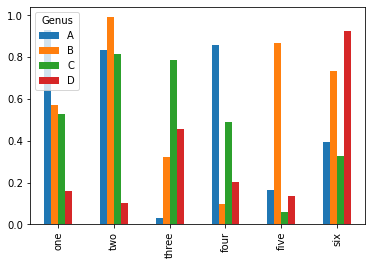

In [11]:
df = pd.DataFrame(np.random.rand(6,4),
                 index=['one','two','three','four','five','six'],
                 columns=pd.Index(['A','B','C','D'], name='Genus'))
df
df.plot.bar()

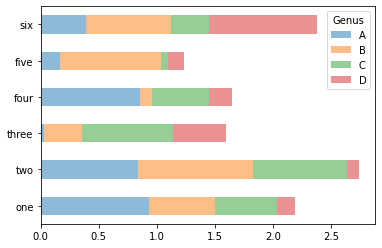

In [13]:
df.plot.barh(stacked=True, alpha=0.5)

In [16]:
tips= pd.read_csv('C:/github/pydata-book-2nd-edition/examples/tips.csv')
tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [17]:
party_counts=pd.crosstab(tips['day'],tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [18]:
party_counts=party_counts.loc[:,2:5]

In [21]:
party_pcts=party_counts.div(party_counts.sum(1),axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


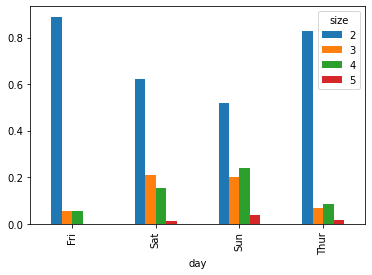

In [22]:
party_pcts.plot.bar()

In [40]:
import seaborn as sns

In [24]:
tips['tip_pct']=tips['tip']/(tips['total_bill']- tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


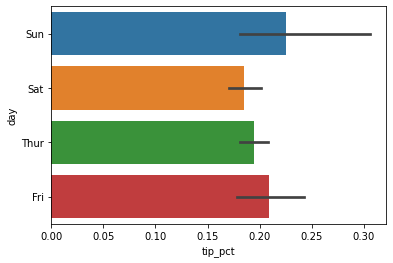

In [25]:
sns.barplot(x='tip_pct',y='day', data=tips, orient='h')

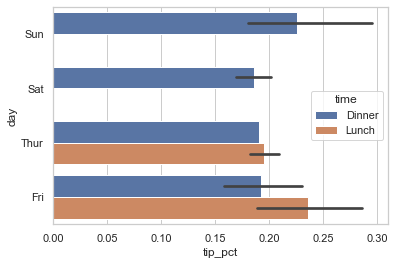

In [32]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')
sns.set(style="whitegrid")

### 히스토그램과 밀도 그래프

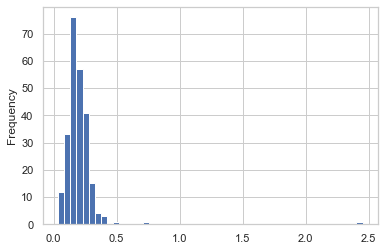

In [36]:
tips['tip_pct'].plot.hist(bins=50)

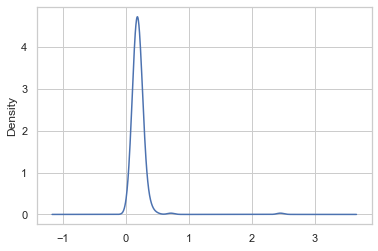

In [37]:
tips['tip_pct'].plot.density()

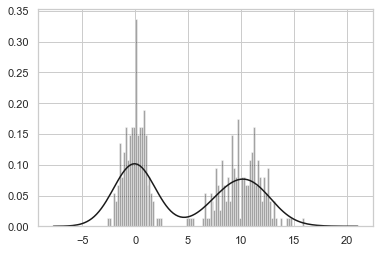

In [43]:
comp1=np.random.normal(0,1,size=200)
comp2=np.random.normal(10,2,size=200)
values=pd.Series(np.concatenate([comp1,comp2]))
sns.distplot(values,bins=100,color='k')

### 산포도

In [44]:
macro= pd.read_csv('C:/github/pydata-book-2nd-edition/examples/macrodata.csv')
macro

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [45]:
data= macro[['cpi','m1','tbilrate', 'unemp']]

In [47]:
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

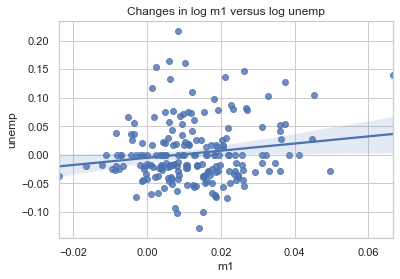

In [48]:
sns.regplot('m1','unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1','unemp'))

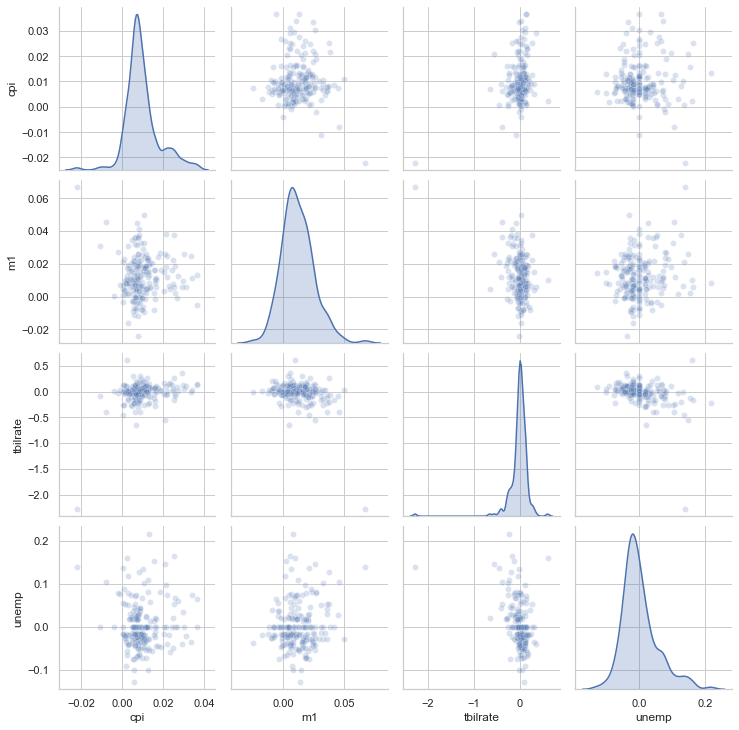

In [49]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha':0.2})

### 패싯 그리드와 범주형 데이터

C:\Users\82102\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


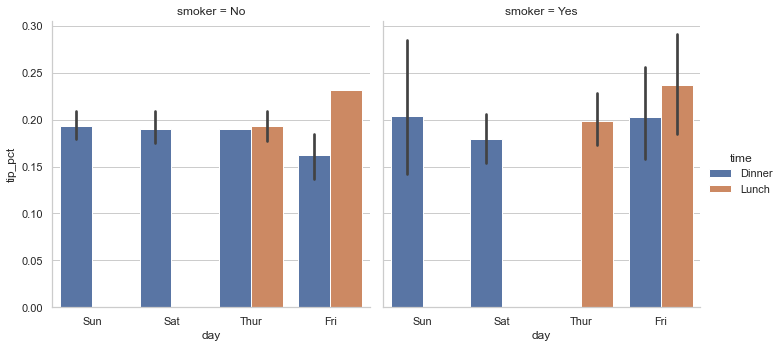

In [50]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker',
              kind='bar',data=tips[tips.tip_pct<1])

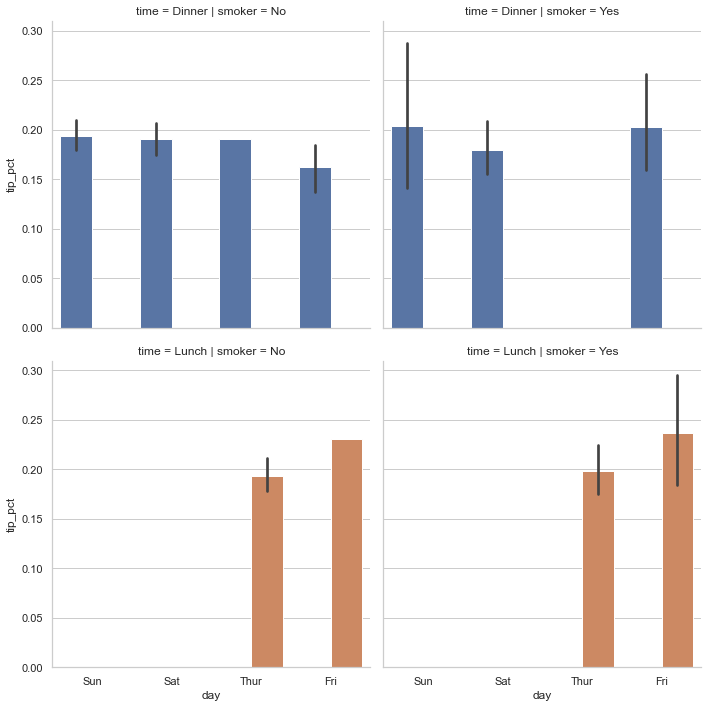

In [51]:
sns.factorplot(x='day', y='tip_pct', hue='time', row='time', col='smoker',
              kind='bar',data=tips[tips.tip_pct<1])

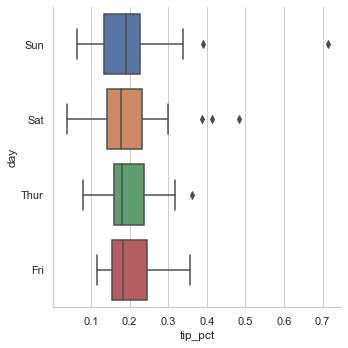

In [52]:
sns.factorplot(x='tip_pct', y='day',
              kind='box',data=tips[tips.tip_pct<1])